This Notebook is used to create the file that contains the independent variables of our multivariate timeseries forecasting model

# Gas Price

In [ ]:
import os
import pandas as pd

# Directory path containing the Excel files
directory = '/content/drive/MyDrive/PHB009/dataset/precio gas MIBGAS/'

# List to store data from each file
data = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xlsx') or filename.endswith('.xls'):
        file_path = os.path.join(directory, filename)

        # Read the 'PHB009' worksheet from the Excel file
        df = pd.read_excel(file_path, sheet_name='PHB009')

        # Extract 'Date' and 'GasPrice' columns
        df_subset = df[['Date', 'GasPrice']]

        # Append data to the list
        data.append(df_subset)

# Concatenate data from all files into a single DataFrame
combined_df = pd.concat(data, ignore_index=True)

# Sort the data by the 'Date' column
combined_df = combined_df.sort_values(by='Date')

# Save the combined data to a CSV file
combined_df.to_csv('/content/drive/MyDrive/PHB009/dataset/precio gas MIBGAS/precioGas.csv', index=False)


In [ ]:
combined_df.head()

,Date,GasPrice
730,2018-01-01,21.81
729,2018-01-02,22.51
728,2018-01-03,20.40
727,2018-01-04,19.01
726,2018-01-05,19.78


In [ ]:
import plotly.express as px

# Create an interactive line plot
fig = px.line(combined_df, x='Date', y='GasPrice', title='Gas Price Time Series')

# Customize the plot layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Gas Price',
    legend_title='Data',
    hovermode='x',
    autosize=True,
    margin=dict(l=50, r=20, t=50, b=50),
    showlegend=True
)

# Show the interactive plot
fig.show()


## Oferta y demanda de energia

In [ ]:
import os
import pandas as pd
import json

# Directory path containing the JSON files
directory = '/content/drive/MyDrive/PHB009/dataset/oferta demanda energia/'

# List to store data from each file
data = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)

        # Read the JSON file
        with open(file_path, 'r') as f:
            json_data = json.load(f)

        # Append data to the list
        data.extend(json_data)

# Create a DataFrame from the combined data
df = pd.DataFrame(data)

# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

# Extract the date
df['Date'] = df['datetime'].dt.date

# Replace values in 'groupId' column
df['groupId'] = df['groupId'].replace('Demand at busbars', 'Demand')

# Drop non-neccessary columns
df.drop(['type', 'description_code', 'percentage', 'datetime'], axis=1, inplace=True)

# Print the resulting DataFrame
df.head()

,groupId,value,Date
0,Renewable,76797.427,2022-12-31
1,Renewable,136436.274,2023-01-01
2,Renewable,153684.712,2023-01-02
3,Renewable,138118.538,2023-01-03
4,Renewable,143048.252,2023-01-04


In [ ]:
# Convert 'groupId' values into separate columns
df_pivot = df.pivot(index='Date', columns='groupId', values='value').reset_index()

# Sort the data by the 'Date' column
df_pivot = df_pivot.sort_values(by='Date')

# Calculate daily % of renewable energy
df_pivot['Renewable%'] = 100*df_pivot['Renewable']/(df_pivot['Renewable']+df_pivot['Non-renewable'])

# Change sign on Demand
df_pivot['Demand'] = -df_pivot['Demand']

# Print the resulting DataFrame
print(df_pivot)

groupId        Date     Demand  Non-renewable  Renewable  Renewable%
0        2017-12-31  34073.628      10806.662  41132.429   79.193587
1        2018-01-01  20545.034      13246.167  52707.752   79.916027
2        2018-01-02  18436.677      20002.151  63514.750   76.050176
3        2018-01-03  27336.476      13118.374  64639.179   83.129132
4        2018-01-04  24369.628      15972.084  75027.418   82.448163
...             ...        ...            ...        ...         ...
1994     2023-06-17  42350.000       4863.000  51652.000   91.395205
1995     2023-06-18   7314.400      11518.800  68657.100   85.633089
1996     2023-06-19   1509.300      13711.000  69658.000   83.553839
1997     2023-06-20   1708.600       6420.500  80035.700   92.573696
1998     2023-06-21   5723.800       2169.200  61919.400   96.615311

[1999 rows x 5 columns]


In [ ]:
# Save the combined data to a CSV file
df_pivot.to_csv('/content/drive/MyDrive/PHB009/dataset/oferta demanda energia/ofertademanda.csv', index=False)

In [ ]:
# Create an interactive line plot
fig = px.line(df_pivot, x='Date', y=['Demand', 'Non-renewable', 'Renewable'],
              title='Energy Demand and Production')

# Customize the plot layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Energy',
    legend_title='Energy Sources',
    hovermode='x',
    autosize=True,
    margin=dict(l=50, r=20, t=50, b=50),
    showlegend=True
)

# Show the interactive plot
fig.show()

## Combining Pricing, Gas Pricing and offer and demna files

In [ ]:
import pandas as pd

# Read the data from the first file
df1 = pd.read_csv('/content/drive/MyDrive/PHB009/dataset/precio electricidad OMIE/DailyPrice.csv', parse_dates=['timestamp'])

# Read the data from the second file
df2 = pd.read_csv('/content/drive/MyDrive/PHB009/dataset/precio gas MIBGAS/precioGas.csv', parse_dates=['Date'])

# Read the data from the third file
df3 = pd.read_csv('/content/drive/MyDrive/PHB009/dataset/oferta demanda energia/ofertademanda.csv', parse_dates=['Date'])

# Convert 'Date' column to datetime type
df1['Date'] = pd.to_datetime(df1['timestamp'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

# Set 'Date' column as index for each DataFrame
df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)
df3.set_index('Date', inplace=True)

# Select data within the desired date range
start_date = '2018-01-01'
end_date = '2023-06-01'
df1 = df1.loc[start_date:end_date].fillna(method='ffill')
df2 = df2.loc[start_date:end_date].fillna(method='ffill')
df3 = df3.loc[start_date:end_date].fillna(method='ffill')

# Combine DataFrames into a single DataFrame based on the 'Date' column
combined_df = pd.concat([df1, df2, df3], axis=1)

# Drop the 'timestamp' column
combined_df.drop(columns=['timestamp'], inplace=True)

# Save the combined data to a new file
combined_df.to_csv('/content/drive/MyDrive/PHB009/dataset/model/precombined_data.csv', index=True)


In [ ]:
combined_df

,Price,Open,High,Low,Close,GasPrice,Demand,Non-renewable,Renewable,Renewable%
Date,,,,,,,,,,
2018-01-01,25.575652,28.10,33.00,19.84,28.10,21.81,20545.034,13246.167,52707.752,79.916027
2018-01-02,40.395000,27.60,55.54,19.10,50.50,22.51,18436.677,20002.151,63514.750,76.050176
2018-01-03,45.659167,39.63,54.45,28.10,51.01,20.40,27336.476,13118.374,64639.179,83.129132
2018-01-04,45.440833,41.69,50.08,39.10,48.11,19.01,24369.628,15972.084,75027.418,82.448163
2018-01-05,44.158750,40.00,61.01,13.51,58.05,19.78,6050.885,13230.971,70900.792,84.273513
...,...,...,...,...,...,...,...,...,...,...
2023-05-28,85.040833,110.00,115.38,50.00,115.38,24.95,11943.874,8920.884,49018.014,84.602945
2023-05-29,95.328750,107.64,131.86,80.00,129.40,26.05,11057.423,9343.901,64469.725,87.341225
2023-05-30,93.355833,119.00,124.03,75.00,122.55,25.59,9792.152,8348.557,59350.614,87.668155


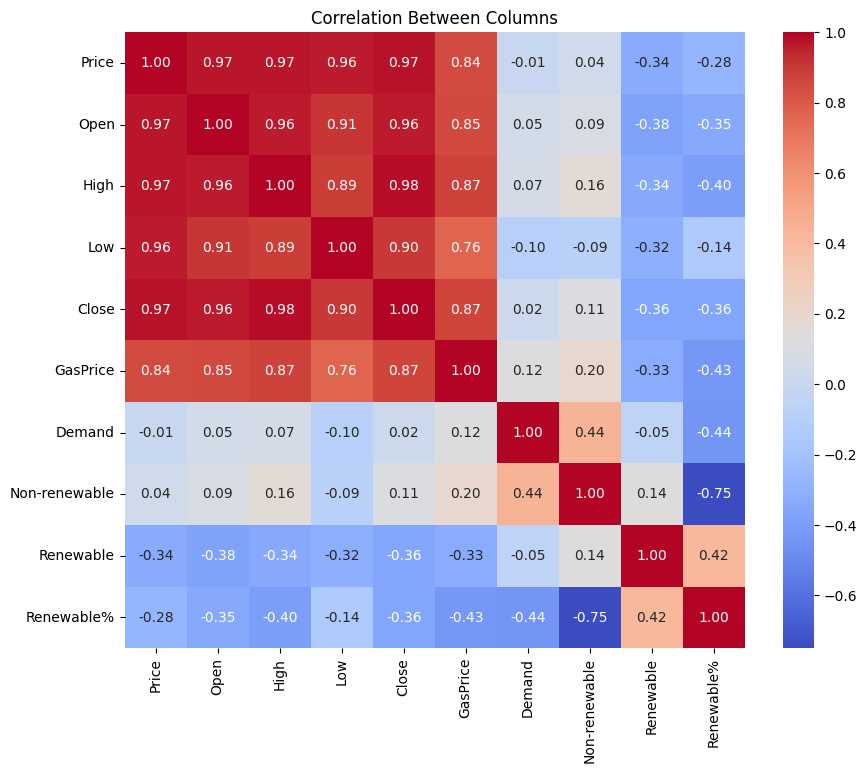

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Columns')
plt.show()

In [ ]:
import plotly.express as px

# Reset the index to make 'Date' a column again (optional)
combined_df.reset_index(inplace=True)

# Create an interactive line plot
fig = px.line(combined_df, x='Date', y=['Price', 'GasPrice'],
              title='Price and GasPrice Time Series')

# Customize the plot layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price/GasPrice',
    legend_title='Data',
    hovermode='x',
    autosize=True,
    margin=dict(l=50, r=20, t=50, b=50),
    showlegend=True
)

# Show the interactive plot
fig.show()

# API MINDEE

Add all the columns obtained via Mindee API into the previous consolidated file

In [ ]:
import os
import pandas as pd
import json

# Function to extract required data from JSON files
def process_json_file(file_path):
    try:
        with open(file_path, 'r') as f:
            data_list = json.load(f)

        rows = []
        for data in data_list:
            date = pd.to_datetime(f"{int(data['año'])}-{int(data['mes'])}-{int(data['dia'])}", format="%Y-%m-%d")
            value = data['valor']
            column_name = os.path.splitext(os.path.basename(file_path))[0].split('_')[0]
            rows.append({'Date': date, 'Value': value, 'Column_Name': column_name})

        return rows
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return []

# Get a list of all JSON files in the directory
directory = "/content/drive/MyDrive/PHB009/dataset/mindee"
json_files = [file for file in os.listdir(directory) if file.endswith('.json')]

# Initialize a list to store the data rows
all_rows = []

# Process each JSON file and append data rows to the list
for file in json_files:
    file_path = os.path.join(directory, file)
    rows = process_json_file(file_path)
    all_rows.extend(rows)

# Create the final dataframe
df = pd.DataFrame(all_rows).pivot(index='Date', columns='Column_Name', values='Value')

# Optionally, sort the dataframe by the index (Date) if needed
df.sort_index(inplace=True)

# Display the resulting dataframe
print(df)

Column_Name     BOMBEO  BRENT     CARBON  CICLOCOMBINADO  COGENERACION  \
Date                                                                     
2018-01-01         NaN    NaN        NaN             NaN           NaN   
2018-01-02         NaN    NaN        NaN             NaN           NaN   
2018-01-03         NaN    NaN        NaN             NaN           NaN   
2018-01-04         NaN    NaN        NaN             NaN           NaN   
2018-01-05         NaN    NaN        NaN             NaN           NaN   
...                ...    ...        ...             ...           ...   
2023-05-28   10817.663    NaN   6044.035      139474.380     56745.509   
2023-05-29    8920.884  77.08  10985.094      153391.592     60648.221   
2023-05-30    9343.901  73.79  13181.899      186500.774     61086.948   
2023-05-31    8348.557  72.10  12401.196      183438.527     60219.062   
2023-06-01   11392.400  74.31  12549.800      177975.435     61935.620   

Column_Name     EOLICA  HIDRAULICA   

Adding estimated future energy price (OMIP)

In [ ]:
import os
import json
import argparse
import pandas as pd

# Function to extract required data from JSON file
def process_json_file(file_path):
    try:
        with open(file_path, 'r') as f:
            data_list = json.load(f)

        rows = []
        for data in data_list:
            year, month = int(data['año']), int(data['mes'])
            value = data['valor']
            column_name = os.path.splitext(os.path.basename(file_path))[0].split('_')[0]

            # Generate the date range for the entire month
            date_range = pd.date_range(start=f"{year}-{month}-01", periods=pd.Period(f"{year}-{month}").days_in_month, freq='D')

            # Create a row for each day with the same value as the first day
            for date in date_range:
                rows.append({'Date': date, 'Value': value, 'Column_Name': column_name})

        return rows
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return []

# Get the file path from the arguments
file_path = "/content/drive/MyDrive/PHB009/dataset/mindee/precio electricidad real y estimado/OMIP_0.json"

# Process the specified JSON file and create the dataframe
rows = process_json_file(file_path)
df_OMIP = pd.DataFrame(rows).pivot(index='Date', columns='Column_Name', values='Value')

# Optionally, sort the dataframe by the index (Date) if needed
df_OMIP.sort_index(inplace=True)

# Display the resulting dataframe
print(df_OMIP)

Column_Name    OMIP
Date               
2018-01-01    61.85
2018-01-02    61.85
2018-01-03    61.85
2018-01-04    61.85
2018-01-05    61.85
...             ...
2023-06-26   179.72
2023-06-27   179.72
2023-06-28   179.72
2023-06-29   179.72
2023-06-30   179.72

[2007 rows x 1 columns]


In [ ]:
df_OMIP.to_csv('/content/drive/MyDrive/PHB009/dataset/model/OMIP.csv')

In [ ]:
# Merge the dataframes based on the 'Date' column
merged_df = pd.merge(df, df_OMIP, on='Date', how='inner')

# Display the merged dataframe
print(merged_df)

Column_Name     BOMBEO  BRENT     CARBON  CICLOCOMBINADO  COGENERACION  \
Date                                                                     
2018-01-01         NaN    NaN        NaN             NaN           NaN   
2018-01-02         NaN    NaN        NaN             NaN           NaN   
2018-01-03         NaN    NaN        NaN             NaN           NaN   
2018-01-04         NaN    NaN        NaN             NaN           NaN   
2018-01-05         NaN    NaN        NaN             NaN           NaN   
...                ...    ...        ...             ...           ...   
2023-05-28   10817.663    NaN   6044.035      139474.380     56745.509   
2023-05-29    8920.884  77.08  10985.094      153391.592     60648.221   
2023-05-30    9343.901  73.79  13181.899      186500.774     61086.948   
2023-05-31    8348.557  72.10  12401.196      183438.527     60219.062   
2023-06-01   11392.400  74.31  12549.800      177975.435     61935.620   

Column_Name     EOLICA  HIDRAULICA   

In [ ]:
merged_df.to_csv('/content/drive/MyDrive/PHB009/dataset/model/mindeeData.csv')

Remove inter-country balances, as it is not available for the full period.

In [ ]:
import os
import pandas as pd
import json

# Function to extract required data from JSON files
def process_json_file(file_path):
    try:
        with open(file_path, 'r') as f:
            data_list = json.load(f)

        rows = []
        for data in data_list:
            date = pd.to_datetime(f"{int(data['año'])}-{int(data['mes'])}-{int(data['dia'])}", format="%Y-%m-%d")
            value = data['valor']
            column_name = os.path.splitext(os.path.basename(file_path))[0].split('_')[0]
            rows.append({'Date': date, 'Value': value, 'Column_Name': column_name})

        return rows
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return []

# Get a list of all JSON files in the directory
directory = "/content/drive/MyDrive/PHB009/dataset/mindee/Saldos"
json_files = [file for file in os.listdir(directory) if file.endswith('.json')]

# Initialize a list to store the data rows
all_rows = []

# Process each JSON file and append data rows to the list
for file in json_files:
    file_path = os.path.join(directory, file)
    rows = process_json_file(file_path)
    all_rows.extend(rows)

# Create the final dataframe
df_saldos = pd.DataFrame(all_rows).pivot(index='Date', columns='Column_Name', values='Value')

# Optionally, sort the dataframe by the index (Date) if needed
df_saldos.sort_index(inplace=True)

# Display the resulting dataframe
print(df_saldos)

Column_Name  ANDORRA  FRANCIA  MARRUECOS  PORTUGAL
Date                                              
2019-01-01    -849.0  58989.6     5970.0  -23642.6
2019-01-02    -777.0  57901.7     3520.0  -20401.1
2019-01-03    -789.0  23586.2     4960.0   34407.6
2019-01-04    -653.0   9345.1     4320.0   18124.3
2019-01-05   -1106.0  33191.3     6260.0    4232.4
...              ...      ...        ...       ...
2021-08-27   -1021.0  61830.9        0.0  -22346.0
2021-08-28    -915.0  55781.5      518.0  -63694.1
2021-08-29    -645.0  55397.0     2800.0  -54284.3
2021-08-30    -771.0  53911.8      790.0  -26254.8
2021-08-31    -546.0  57732.4     -450.0  -20810.5

[974 rows x 4 columns]


Adding Mindee information to the combined data

In [ ]:
import pandas as pd

# Read the data from the first file
df1 = pd.read_csv('/content/drive/MyDrive/PHB009/dataset/model/precombined_data.csv', parse_dates=['Date'])

# Read the data from the second file
df2 = pd.read_csv('/content/drive/MyDrive/PHB009/dataset/model/mindeeData.csv', parse_dates=['Date'])

# Convert 'Date' column to datetime type
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Set 'Date' column as index for each DataFrame
df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)

# Select data within the desired date range
start_date = '2018-01-01'
end_date = '2023-06-01'
df1 = df1.loc[start_date:end_date].fillna(method='ffill')
df2 = df2.loc[start_date:end_date].fillna(method='ffill')

# Combine DataFrames into a single DataFrame based on the 'Date' column
combined_df = pd.concat([df1, df2], axis=1)

# Save the combined data to a new file
combined_df.to_csv('/content/drive/MyDrive/PHB009/dataset/model/combined_data.csv', index=True)


In [ ]:
combined_df.dropna().head()

,Price,Open,High,Low,Close,GasPrice,Demand,Non-renewable,Renewable,Renewable%,...,CICLOCOMBINADO,COGENERACION,EOLICA,HIDRAULICA,IBEX35,MIBGAS,NUCLEAR,SOLAR,TTF,OMIP
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-01,75.558333,74.00,110.68,63.99,110.68,39.53,23.022,5096.871,79151.523,93.950186,...,49066.775,64423.439,99080.189,59213.305730,8675.7,39.53,167497.560,80381.800,40.584,94.25
2021-08-02,103.279167,105.88,108.41,98.55,104.97,41.55,-28.734,9467.866,77619.114,89.128265,...,93306.603,70998.274,65453.988,78857.706338,8758.7,41.55,166914.473,76732.282,40.613,94.25
2021-08-03,106.057083,100.97,113.51,100.85,107.98,41.79,5076.125,4082.127,80489.527,95.173174,...,91090.957,69227.501,81134.425,77575.666516,8772.8,41.79,166703.049,79371.735,42.101,94.25
2021-08-04,104.842917,106.00,116.86,88.91,116.86,41.99,11651.306,3589.405,75165.509,95.442310,...,100143.782,67959.316,117793.466,80439.859616,8792.9,41.99,166655.697,81350.458,41.137,94.25
2021-08-05,101.754583,115.51,115.51,77.75,115.02,41.77,5323.026,12246.616,57085.350,82.336263,...,68712.468,67369.424,126170.054,75018.958684,8836.5,41.77,166473.590,84796.276,41.754,94.25


# Stockstats indicators

In [ ]:
!pip install stockstats

In [ ]:
columns_to_select = ['Open','Close', 'High', 'Low', 'Demand']

df = combined_df[columns_to_select].copy()

# Add the date from the index as a new column
df['date'] = df.index

# Reset the index
df.reset_index(drop=True, inplace=True)

# Rename the 'Demand' column to 'volume'
df.rename(columns={'Demand': 'volume'}, inplace=True)

print(df)

        Open   Close    High    Low     volume       date
0      28.10   28.10   33.00  19.84  20545.034 2018-01-01
1      27.60   50.50   55.54  19.10  18436.677 2018-01-02
2      39.63   51.01   54.45  28.10  27336.476 2018-01-03
3      41.69   48.11   50.08  39.10  24369.628 2018-01-04
4      40.00   58.05   61.01  13.51   6050.885 2018-01-05
...      ...     ...     ...    ...        ...        ...
1973  110.00  115.38  115.38  50.00  11943.874 2023-05-28
1974  107.64  129.40  131.86  80.00  11057.423 2023-05-29
1975  119.00  122.55  124.03  75.00   9792.152 2023-05-30
1976   99.22  115.00  119.06  65.70   7731.300 2023-05-31
1977   96.61  101.77  103.79  68.18   6655.000 2023-06-01

[1978 rows x 6 columns]


In [ ]:
import pandas as pd
from stockstats import wrap, unwrap

df = wrap(df)
df.init_all()
df

,open,close,high,low,volume,rate,middle,tp,boll,boll_ub,...,pgo,psl,rsi,rsv,stochrsi,tema,trix,wr,vr,vwma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,28.10,28.10,33.00,19.84,20545.034,NaN,26.980000,26.980000,28.100000,NaN,...,0.000000,0.000000,NaN,62.765957,NaN,28.100000,0.000000,-37.234043,100.000000,26.980000
2018-01-02,27.60,50.50,55.54,19.10,18436.677,79.715302,41.713333,41.713333,39.300000,70.978384,...,0.436964,8.333333,100.000000,86.169045,NaN,49.066400,12.668874,-13.830955,279.475751,33.948235
2018-01-03,39.63,51.01,54.45,28.10,27336.476,1.009901,44.520000,44.520000,43.203333,69.368045,...,0.301347,16.666667,100.000000,87.568606,NaN,52.250318,8.413074,-12.431394,545.588486,38.305935
2018-01-04,41.69,48.11,50.08,39.10,24369.628,-5.685160,45.763333,45.763333,44.430000,66.349629,...,0.170180,16.666667,87.217832,79.610318,0.000000,50.072074,5.891712,-20.389682,161.784641,40.309887
2018-01-05,40.00,58.05,61.01,13.51,6050.885,20.660985,44.190000,44.190000,47.154000,69.709623,...,0.383998,25.000000,91.315408,93.768421,32.056971,56.562496,4.953145,-6.231579,179.251472,40.552583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,110.00,115.38,115.38,50.00,11943.874,5.514403,93.586667,93.586667,100.131000,123.804398,...,0.242449,75.000000,54.701352,96.080095,95.270196,115.789354,-0.438760,-3.919905,99.961315,74.505862
2023-05-29,107.64,129.40,131.86,80.00,11057.423,12.151153,113.753333,113.753333,101.367500,128.386147,...,0.425023,75.000000,59.800733,98.103608,100.000000,126.409171,-0.216512,-1.896392,109.679919,76.306464
2023-05-30,119.00,122.55,124.03,75.00,9792.152,-5.293663,107.193333,107.193333,101.729000,129.709997,...,0.285677,66.666667,56.456668,92.708904,82.997479,125.680420,-0.001891,-7.176997,102.338916,79.551706


In [ ]:
stats_df = unwrap(df)
stats_df

,open,close,high,low,volume,rate,middle,tp,boll,boll_ub,...,pgo,psl,rsi,rsv,stochrsi,tema,trix,wr,vr,vwma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,28.10,28.10,33.00,19.84,20545.034,NaN,26.980000,26.980000,28.100000,NaN,...,0.000000,0.000000,NaN,62.765957,NaN,28.100000,0.000000,-37.234043,100.000000,26.980000
2018-01-02,27.60,50.50,55.54,19.10,18436.677,79.715302,41.713333,41.713333,39.300000,70.978384,...,0.436964,8.333333,100.000000,86.169045,NaN,49.066400,12.668874,-13.830955,279.475751,33.948235
2018-01-03,39.63,51.01,54.45,28.10,27336.476,1.009901,44.520000,44.520000,43.203333,69.368045,...,0.301347,16.666667,100.000000,87.568606,NaN,52.250318,8.413074,-12.431394,545.588486,38.305935
2018-01-04,41.69,48.11,50.08,39.10,24369.628,-5.685160,45.763333,45.763333,44.430000,66.349629,...,0.170180,16.666667,87.217832,79.610318,0.000000,50.072074,5.891712,-20.389682,161.784641,40.309887
2018-01-05,40.00,58.05,61.01,13.51,6050.885,20.660985,44.190000,44.190000,47.154000,69.709623,...,0.383998,25.000000,91.315408,93.768421,32.056971,56.562496,4.953145,-6.231579,179.251472,40.552583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,110.00,115.38,115.38,50.00,11943.874,5.514403,93.586667,93.586667,100.131000,123.804398,...,0.242449,75.000000,54.701352,96.080095,95.270196,115.789354,-0.438760,-3.919905,99.961315,74.505862
2023-05-29,107.64,129.40,131.86,80.00,11057.423,12.151153,113.753333,113.753333,101.367500,128.386147,...,0.425023,75.000000,59.800733,98.103608,100.000000,126.409171,-0.216512,-1.896392,109.679919,76.306464
2023-05-30,119.00,122.55,124.03,75.00,9792.152,-5.293663,107.193333,107.193333,101.729000,129.709997,...,0.285677,66.666667,56.456668,92.708904,82.997479,125.680420,-0.001891,-7.176997,102.338916,79.551706


In [ ]:
stats_df.columns

Index(['open', 'close', 'high', 'low', 'volume', 'rate', 'middle', 'tp',
       'boll', 'boll_ub', 'boll_lb', 'macd', 'macds', 'macdh', 'pvo', 'pvos',
       'pvoh', 'ppo', 'ppos', 'ppoh', 'qqe', 'qqel', 'qqes', 'cr', 'cr-ma1',
       'cr-ma2', 'cr-ma3', 'tr', 'dx', 'adx', 'adxr', 'log-ret', 'wt1', 'wt2',
       'supertrend_ub', 'supertrend_lb', 'supertrend', 'bop', 'cti', 'eribull',
       'eribear', 'rvgi', 'rvgis', 'kst', 'ao', 'aroon', 'atr', 'cci',
       'change', 'chop', 'cmo', 'coppock', 'dma', 'ichimoku', 'inertia', 'ftr',
       'kama', 'kdjk', 'kdjd', 'kdjj', 'ker', 'mfi', 'ndi', 'pdi', 'pgo',
       'psl', 'rsi', 'rsv', 'stochrsi', 'tema', 'trix', 'wr', 'vr', 'vwma'],
      dtype='object')

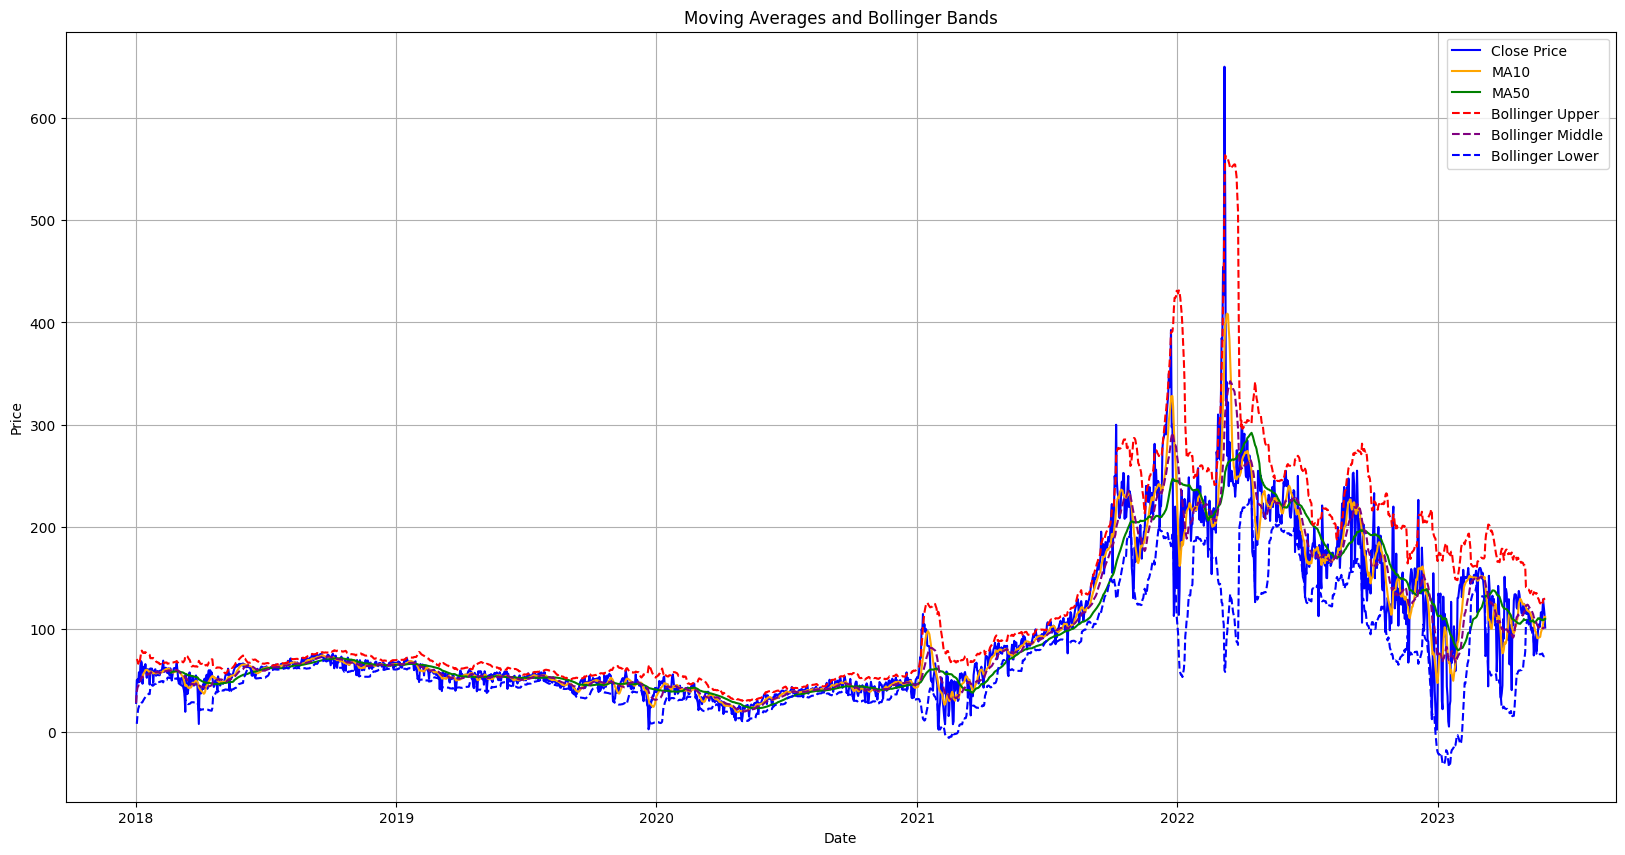

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from stockstats import StockDataFrame

# Calculate Moving Averages (MA) using the stockstats library
stats_df['ma10'] = stats_df['close'].rolling(window=10).mean()
stats_df['ma50'] = stats_df['close'].rolling(window=50).mean()

# Plotting
plt.figure(figsize=(20, 10))

# Plot Closing Price and Moving Averages
plt.plot(stats_df['close'], label='Close Price', color='blue')
plt.plot(stats_df['ma10'], label='MA10', color='orange')
plt.plot(stats_df['ma50'], label='MA50', color='green')

# Plot Bollinger Bands
plt.plot(stats_df['boll_ub'], label='Bollinger Upper', color='red', linestyle='dashed')
plt.plot(stats_df['boll'], label='Bollinger Middle', color='purple', linestyle='dashed')
plt.plot(stats_df['boll_lb'], label='Bollinger Lower', color='blue', linestyle='dashed')

plt.title('Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.show()

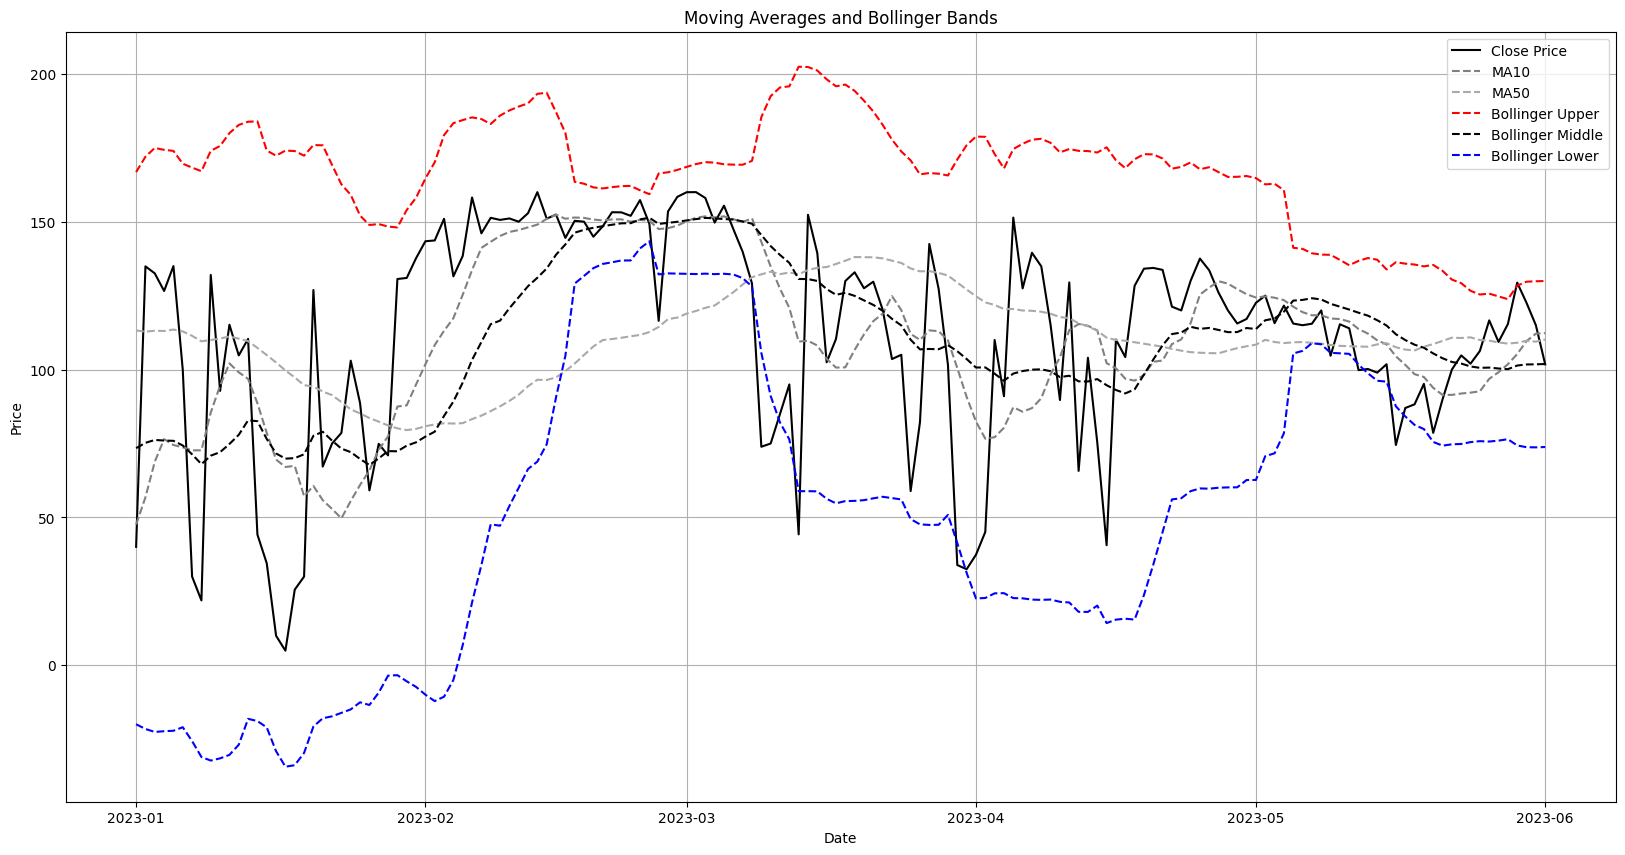

In [ ]:
# Filter data from 2023-01-01 onwards
filtered_stats_df = stats_df['2023-01-01':]

# Plotting
plt.figure(figsize=(20, 10))

# Plot Closing Price and Moving Averages
plt.plot(filtered_stats_df['close'], label='Close Price', color='black')
plt.plot(filtered_stats_df['ma10'], label='MA10', color='gray', linestyle='dashed')
plt.plot(filtered_stats_df['ma50'], label='MA50', color='darkgray', linestyle='dashed')

# Plot Bollinger Bands
plt.plot(filtered_stats_df['boll_ub'], label='Bollinger Upper', color='red', linestyle='dashed')
plt.plot(filtered_stats_df['boll'], label='Bollinger Middle', color='black', linestyle='dashed')
plt.plot(filtered_stats_df['boll_lb'], label='Bollinger Lower', color='blue', linestyle='dashed')

plt.title('Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.show()

# INE Data

## GDPGrowth

In [ ]:
import pandas as pd

# Read the original CSV file
data = pd.read_csv("/content/drive/MyDrive/PHB009/dataset/INE/GDPGrowth.csv")

# Define a mapping from quarter to month offset
quarter_to_month = {
    'Q1': 1,
    'Q2': 4,
    'Q3': 7,
    'Q4': 10
}

# Filter data to keep values from 2018-01-01 onwards
data = data[data['Quarter'].str.extract(r'(\d{4})')[0].astype(int) >= 2018]

# Transform the data
data["Date"] = data["Quarter"].apply(lambda x: pd.Timestamp(year=int(x[-4:]), month=quarter_to_month[x[:2]], day=1))
data["AnualRate"] = data["Annual rate (%)"]
data["PreviousQuarter"] = data["Previous quarter rate (%)"]

# Select and reorder columns
new_data = data[["Date", "AnualRate", "PreviousQuarter"]]

# Save the transformed data to a new CSV file
new_data.to_csv("/content/drive/MyDrive/PHB009/dataset/INE/Transformed_GDPGrowth.csv", index=False)
new_data

,Date,AnualRate,PreviousQuarter
0,2023-04-01,1.8,0.4
1,2023-01-01,4.2,0.5
2,2022-10-01,3.1,0.4
3,2022-07-01,4.9,0.4
4,2022-04-01,7.7,2.6
5,2022-01-01,6.3,-0.5
6,2021-10-01,6.6,2.3
7,2021-07-01,4.2,3.1
8,2021-04-01,17.9,1.4
9,2021-01-01,-4.4,-0.2


## Inflation Rates

In [ ]:
import pandas as pd

# Read the original CSV file
data = pd.read_csv("/content/drive/MyDrive/PHB009/dataset/INE/InflationRates.csv")

# Define a mapping from month to number
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Filter data to keep values from 2018-01-01 onwards
data = data[data['Period'].str.extract(r'(\d{4})')[0].astype(int) >= 2018]

# Transform the data
data["Date"] = data["Period"].apply(lambda x: pd.Timestamp(year=int(x[-4:]), month=month_to_number[x[:-5]], day=1))
data["MonthlyRate"] = data["Monthly rate (%)"]
data["AnnualRate"] = data["Annual rate (%)"]
data["OverTheYear"] = data["Over the year(%)"]

# Select and reorder columns
new_data = data[["Date", "MonthlyRate", "AnnualRate", "OverTheYear"]]

# Save the transformed data to a new CSV file
new_data.to_csv("/content/drive/MyDrive/PHB009/dataset/INE/Transformed_InflationRates.csv", index=False)

new_data

,Date,MonthlyRate,AnnualRate,OverTheYear
0,2023-06-01,-0.5,6.0,3.8
1,2023-05-01,0.0,3.2,1.7
2,2023-04-01,0.6,4.1,1.7
3,2023-03-01,0.4,3.3,1.1
4,2023-02-01,0.9,6.0,0.7
...,...,...,...,...
61,2018-05-01,0.9,2.1,0.9
62,2018-04-01,0.8,1.1,0.0
63,2018-03-01,0.1,1.2,-0.8
64,2018-02-01,0.1,1.1,-0.9


## Population

In [ ]:
import pandas as pd

# Read the original CSV file
data = pd.read_csv("/content/drive/MyDrive/PHB009/dataset/INE/Poblacion.csv")

# Define a mapping from quarter to month offset
quarter_to_month = {
    'T1': 1,
    'T2': 4,
    'T3': 7,
    'T4': 10
}

# Filter data to keep values from 2018-01-01 onwards
data = data[data['PERIODO'].str.extract(r'(\d{4})')[0].astype(int) >= 2018]

# Transform the data
data["Year"] = data["PERIODO"].str.extract(r'(\d{4})')[0].astype(int)
data["Quarter"] = data["PERIODO"].str.extract(r'T(\d)')[0]

# Calculate the date based on the quarter and year
data["Date"] = data.apply(lambda row: pd.Timestamp(year=row["Year"], month=quarter_to_month[f'T{row["Quarter"]}'], day=1), axis=1)

# Select and reorder columns
new_data = data[["Date", "VALOR"]]

# Rename columns
new_data.columns = ["Date", "Poblacion"]

# Save the transformed data to a new CSV file
new_data.to_csv("/content/drive/MyDrive/PHB009/dataset/INE/Transformed_Poblacion.csv", index=False)

new_data

,Date,Poblacion
0,2023-07-01,48.345.223
1,2023-04-01,48.210.037
2,2023-01-01,48.063.694
3,2022-10-01,47.936.043
4,2022-07-01,47.807.612
5,2022-04-01,47.606.863
6,2022-01-01,47.496.903
7,2021-10-01,47.428.198
8,2021-07-01,47.373.420
9,2021-04-01,47.365.593


## Industrial Production Index

In [ ]:
import pandas as pd

# Read the original CSV file
data = pd.read_csv("/content/drive/MyDrive/PHB009/dataset/INE/IndiceProduccionIndustrial.csv")

# Filter data to keep values from 2018-01-01 onwards
data = data[data['PERIODO'].str.extract(r'(\d{4})')[0].astype(int) >= 2018]

# Transform the data
data["Year"] = data["PERIODO"].str.extract(r'(\d{4})')[0].astype(int)
data["Month"] = data["PERIODO"].str.extract(r'M(\d{2})')[0].astype(int)

# Calculate the date based on the quarter and year
data["Date"] = data.apply(lambda row: pd.Timestamp(year=row["Year"], month=row["Month"], day=1), axis=1)

# Select and reorder columns
new_data = data[["Date", "VALOR"]]

# Rename columns
new_data.columns = ["Date", "ProduccionIndustrial"]

# Save the transformed data to a new CSV file
new_data.to_csv("/content/drive/MyDrive/PHB009/dataset/INE/Transformed_IndiceProduccionIndustrial.csv", index=False)

new_data

,Date,ProduccionIndustrial
0,2023-06-01,-1.4
1,2023-05-01,0.0
2,2023-04-01,-4.2
3,2023-03-01,5.4
4,2023-02-01,-0.5
...,...,...
61,2018-05-01,1.2
62,2018-04-01,11.1
63,2018-03-01,-3.7
64,2018-02-01,2.8


## BCE Interest rates

In [ ]:
import pandas as pd

# Read the original CSV file with a semicolon separator
data = pd.read_csv("/content/drive/MyDrive/PHB009/dataset/INE/BCEInterestRates.csv", sep=',')

# Remove the percentage sign from the "Tipos de interes" column and convert it to a float
data["Tipos de interes"] = data["Tipos de interes"].str.replace('%', '').str.replace(',', '.').astype(float)

# Convert the "Fecha" column to a pandas datetime object with the format 'd/m/Y'
data["Fecha"] = pd.to_datetime(data["Fecha"], format='%d/%m/%Y')

# Filter data to keep values from 2018-01-01 onwards
data = data[data["Fecha"] >= "2018-01-01"]

# Select and reorder columns
new_data = data[["Fecha", "Tipos de interes"]]

# Rename columns
new_data.columns = ["Date", "Interest Rate (%)"]

# Save the transformed data to a new CSV file with a semicolon separator
new_data.to_csv("/content/drive/MyDrive/PHB009/dataset/INE/Transformed_BCEInterestRates.csv", index=False)

new_data.head(50)

,Date,Interest Rate (%)
43,2022-07-27,0.50
44,2022-09-14,1.25
45,2022-11-02,2.00
46,2022-12-21,2.50
47,2023-02-08,3.00
48,2023-03-22,3.50
49,2023-05-10,3.75
50,2023-06-21,4.00
51,2023-08-02,4.25


## Data consolidation

In [ ]:
import os
import pandas as pd

# Directory containing the Transformed CSV files
directory = "/content/drive/MyDrive/PHB009/dataset/INE"

# Initialize a DataFrame to store the merged data
merged_data = None

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.startswith("Transformed") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        if merged_data is None:
            merged_data = df
        else:
            # Merge the current DataFrame with the previously merged data
            merged_data = pd.merge(merged_data, df, on='Date', how='outer')

# Convert the 'Date' column in the merged_data DataFrame to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Generate a date range between 2018-01-01 and 2023-06-01
date_range = pd.date_range(start="2018-01-01", end="2023-06-01")

# Create an empty DataFrame with the date range
empty_data = pd.DataFrame({'Date': date_range})

# Merge the empty DataFrame with the merged_data DataFrame using an outer join
merged_data = pd.merge(empty_data, merged_data, on='Date', how='outer')

# Extract the 'Poblacion' column, remove dots, and convert to float
merged_data['Poblacion'] = merged_data['Poblacion'].str.replace('.', '').astype(float)

# Sort the merged DataFrame by 'Date'
merged_data = merged_data.sort_values(by='Date')

# Filter the data to remove records greater than 2023-06-01
merged_data = merged_data[merged_data['Date'] <= '2023-06-01']

# Forward-fill NaN values for all columns
merged_data.fillna(method='ffill', inplace=True)

# Forward-fill NaN values for all columns
merged_data.fillna(method='bfill', inplace=True)

# Reset the index
merged_data.reset_index(drop=True, inplace=True)

# Save the final DataFrame to a single CSV file
merged_data.to_csv("/content/drive/MyDrive/PHB009/dataset/model/INE.csv", index=False)

merged_data

<ipython-input-59-aa6aad26a4be>:34: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_data['Poblacion'] = merged_data['Poblacion'].str.replace('.', '').astype(float)


,Date,AnualRate,PreviousQuarter,MonthlyRate,AnnualRate,OverTheYear,Poblacion,ProduccionIndustrial,Interest Rate (%)
0,2018-01-01,2.6,0.4,-1.1,0.6,-1.1,46645070.0,3.3,0.50
1,2018-01-02,2.6,0.4,-1.1,0.6,-1.1,46645070.0,3.3,0.50
2,2018-01-03,2.6,0.4,-1.1,0.6,-1.1,46645070.0,3.3,0.50
3,2018-01-04,2.6,0.4,-1.1,0.6,-1.1,46645070.0,3.3,0.50
4,2018-01-05,2.6,0.4,-1.1,0.6,-1.1,46645070.0,3.3,0.50
...,...,...,...,...,...,...,...,...,...
1973,2023-05-28,1.8,0.4,0.0,3.2,1.7,48210037.0,0.0,3.75
1974,2023-05-29,1.8,0.4,0.0,3.2,1.7,48210037.0,0.0,3.75
1975,2023-05-30,1.8,0.4,0.0,3.2,1.7,48210037.0,0.0,3.75
1976,2023-05-31,1.8,0.4,0.0,3.2,1.7,48210037.0,0.0,3.75


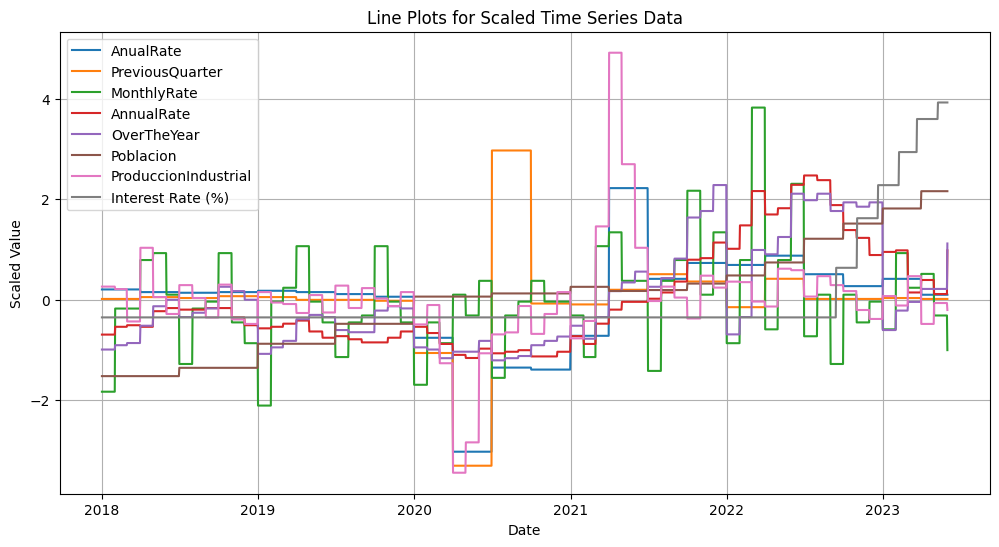

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = merged_data.copy()
scaled_data[merged_data.columns.difference(['Date'])] = scaler.fit_transform(merged_data[merged_data.columns.difference(['Date'])])

# Create line plots for all columns
plt.figure(figsize=(12, 6))
for column in scaled_data.columns:
    if column != 'Date':
        plt.plot(scaled_data['Date'], scaled_data[column], label=column, linestyle='-')

plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.title('Line Plots for Scaled Time Series Data')
plt.legend(loc='best')
plt.grid(True)